In [46]:
%matplotlib inline
import openmc
import openmc.model
import numpy as np
import os

In [32]:
##  Material cards

# 4.95w/o UO2 fuel rods
uo2=openmc.Material(material_id=1,name="UO2") 
uo2.set_density('g/cm3',10.286)
uo2.temperature=293.6
uo2.add_nuclide('U238',0.83831,'wo')
uo2.add_nuclide('U235',0.04311,'wo')
uo2.add_nuclide('O16',0.11858,'wo')

# Al2O3-B4C primary burnable absorber 
al2o3_b4c=openmc.Material(material_id=2,name="Al2O3-B4C") 
al2o3_b4c.set_density('g/cm3',3.30233)
al2o3_b4c.temperature=293.6
al2o3_b4c.add_nuclide('Al27',0.3434,'wo')
al2o3_b4c.add_nuclide('O16',0.3052,'wo')
al2o3_b4c.add_element('B',0.2750,'wo')
al2o3_b4c.add_element('C',0.0764,'wo')

# al2o3=openmc.Material(material_id=98,name="Al2O3") 
# al2o3.set_density('g/cm3',3.970000)
# al2o3.temperature=293.6
# al2o3.add_nuclide('O16',0.470749,'wo')
# al2o3.add_nuclide('Al27',0.529251,'wo')

# b4c=openmc.Material(material_id=99,name="B4C") 
# b4c.set_density('g/cm3',2.520000)
# b4c.temperature=293.6
# b4c.add_element('B',0.782610,'wo')
# b4c.add_element('C',0.217390,'wo')

#
# 12w/o Gd2O3 1.8w/o UO2 Integrated Burnale Absorber 
#
# 12w/o Gd2O3 
# The enrichment is in Gd155
# Each isotope weight fraction must be calculated using the natural weight fraction as basis for normalization 
gd2o3_ba=openmc.Material(material_id=3,name="Gd2O3-12w/o") 
gd2o3_ba.set_density('g/cm3',7.407) # https://www.americanelements.com/gadolinium-oxide-12064-62-9
gd2o3_ba.temperature=293.6
gd2o3_ba.add_nuclide('Gd152',0.0017,'wo')
gd2o3_ba.add_nuclide('Gd154',0.0191,'wo')
gd2o3_ba.add_nuclide('Gd155',0.1025,'wo')
gd2o3_ba.add_nuclide('Gd156',0.1818,'wo')
gd2o3_ba.add_nuclide('Gd157',0.1399,'wo')
gd2o3_ba.add_nuclide('Gd158',0.2235,'wo')
gd2o3_ba.add_nuclide('Gd160',0.1991,'wo')
gd2o3_ba.add_nuclide('O16',0.1323,'wo')
# the following doesn't work in openmc because Gd has more than 2 isotopes, had to do it manually 
# gd2o3_ba.add_element('Gd',2.0,enrichment=12.0,enrichment_target='Gd155',enrichment_type='wo')
# gd2o3_ba.add_nuclide('O16',3.0,'wo')
#
# 1.8w/o UO2 
uo2_ba=openmc.Material(material_id=4,name="UO2-1.8w/o") 
uo2_ba.set_density('g/cm3',10.4) # % https://serpent.vtt.fi/mediawiki/index.php/Tutorial
uo2_ba.temperature=293.6
uo2_ba.add_nuclide('U238',0.86579,'wo')
uo2_ba.add_nuclide('U235',0.01567,'wo')
uo2_ba.add_nuclide('O16',0.11854,'wo')
#
# vary Gd2O3 concentration between 2w/o to 7w/o 
gd2o3_uo2 = openmc.Material.mix_materials([gd2o3_ba,uo2_ba],[0.07,0.93],'wo')

# Boron Carbide
b4c=openmc.Material(material_id=5,name="B4C") 
b4c.set_density('g/cm3',2.520000)
b4c.temperature=293.6
b4c.add_element('B',0.782610,'wo')
b4c.add_element('C',0.217390,'wo')

# AgInCd regulating rod 
agincd=openmc.Material(material_id=6,name="AgInCd") 
agincd.set_density('g/cm3',10.17)
agincd.temperature=293.6
agincd.add_nuclide('Ag107',0.41440,'wo')
agincd.add_nuclide('Ag109',0.38560,'wo')
agincd.add_nuclide('Cd106',0.00060,'wo')
agincd.add_nuclide('Cd108',0.00045,'wo')
agincd.add_nuclide('Cd110',0.00620,'wo')
agincd.add_nuclide('Cd111',0.00640,'wo')
agincd.add_nuclide('Cd112',0.01205,'wo')
agincd.add_nuclide('Cd113',0.00615,'wo')
agincd.add_nuclide('Cd114',0.01445,'wo')
agincd.add_nuclide('Cd116',0.00370,'wo')
agincd.add_nuclide('In113',0.00645,'wo')
agincd.add_nuclide('In115',0.14355,'wo')
agincd.add_nuclide('Sn114',0.00000,'wo')
agincd.add_nuclide('Sn116',0.00000,'wo')

# Steel, Stainless 304
ss=openmc.Material(material_id=7,name="SS304") 
ss.set_density('g/cm3',8.000000)
ss.temperature=293.6
ss.add_element('C',0.000400,'wo')
ss.add_element('Si',0.005000,'wo')
ss.add_nuclide('P31',0.000230,'wo')
ss.add_element('S',0.000150,'wo')
ss.add_element('Cr',0.190000,'wo')
ss.add_nuclide('Mn55',0.010000,'wo')
ss.add_element('Fe',0.701730,'wo')
ss.add_element('Ni',0.092500,'wo')

# Zircaloy-2
zr2=openmc.Material(material_id=8,name="ZR2") 
zr2.set_density('g/cm3',6.560000)
zr2.temperature=293.6
zr2.add_nuclide('O16',0.001197,'wo')
zr2.add_element('Cr',0.000997,'wo')
zr2.add_element('Fe',0.000997,'wo')
zr2.add_element('Ni',0.000499,'wo')
zr2.add_element('Zr',0.982348,'wo')
zr2.add_element('Sn',0.013962,'wo')

# Zircaloy-4
zr4=openmc.Material(material_id=9,name="ZR4") 
zr4.set_density('g/cm3',6.560000)
zr4.temperature=293.6
zr4.add_nuclide('O16',0.001196,'wo')
zr4.add_element('Cr',0.000997,'wo')
zr4.add_element('Fe',0.001994,'wo')
zr4.add_element('Zr',0.981858,'wo')
zr4.add_element('Sn',0.013955,'wo')

# Light Water 
h2o = openmc.Material(material_id=10,name="H2O")
h2o.set_density('g/cm3',1.0)
h2o.temperature=293.6
h2o.add_nuclide('H1',0.6667)
h2o.add_nuclide('O16',0.3333)
h2o.add_s_alpha_beta('c_H_in_H2O')

materials = openmc.Materials([uo2,al2o3_b4c,gd2o3_uo2,b4c,agincd,ss,zr2,zr4,h2o])
materials.cross_sections = '/mnt/h/endfb80_hdf5/cross_sections.xml' 
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <cross_sections>/mnt/h/endfb80_hdf5/cross_sections.xml</cross_sections>
  <material depletable="true" id="1" name="UO2" temperature="293.6">
    <density units="g/cm3" value="10.1" />
    <nuclide name="U238" wo="0.83831" />
    <nuclide name="U235" wo="0.04311" />
    <nuclide name="O16" wo="0.11858" />
  </material>
  <material id="2" name="Al2O3-B4C" temperature="293.6">
    <density units="g/cm3" value="3.30233" />
    <nuclide name="Al27" wo="0.3434" />
    <nuclide name="O16" wo="0.3052" />
    <nuclide name="B10" wo="0.05047761365645146" />
    <nuclide name="B11" wo="0.22452238634354854" />
    <nuclide name="C12" wo="0.0754837229645555" />
    <nuclide name="C13" wo="0.0009162770354444986" />
  </material>
  <material id="5" name="B4C" temperature="293.6">
    <density units="g/cm3" value="2.52" />
    <nuclide name="B10" wo="0.14365194626791083" />
    <nuclide name="B11" wo="0.6389580537320891" />
    <nuclide name="C12" w

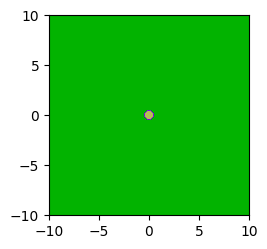

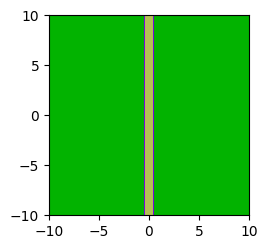

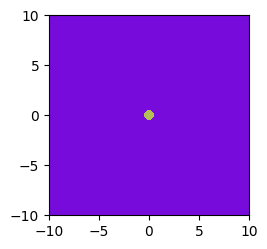

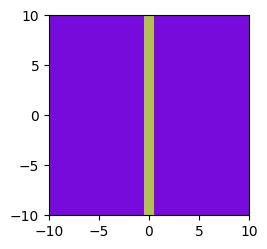

In [97]:
## Geometry 

#
# Surfaces
#
s101=openmc.ZCylinder(x0=0.0, y0=0.0, r=0.4096)
s102=openmc.ZCylinder(x0=0.0, y0=0.0, r=0.4178)
s103=openmc.ZCylinder(x0=0.0, y0=0.0, r=0.4750)

#
# Regions 
#
# fuel 
r1 = -s101    # fuel meat 
r2= -s102 & +s101 # void 
r3= -s103 & +s102 # cladding 
r4 = +s103 # water
# regulating cr 
r5 = -s103 # AgInCd
r6 = +s103 # water

#
# Cells
#
# fuel 
c1=openmc.Cell(fill=uo2, region=r1) # fuel meat
c2=openmc.Cell(fill=None, region=r2) # void
c3=openmc.Cell(fill=zr4, region=r3) # cladding
c4=openmc.Cell(fill=h2o, region=r4) # water
# regulating rod 
c5=openmc.Cell(fill=agincd, region=r5) # AgInCd
c6=openmc.Cell(fill=h2o, region=r6) # water

#
# Universes
#
# fuel 
f=openmc.Universe(cells=[c1,c2,c3,c4])
f.plot(width=(20.0, 20.0), basis='xy', color_by='material')
f.plot(width=(20.0, 20.0), basis='yz', color_by='material')
# regulating rod
r=openmc.Universe(cells=[c5,c6])
r.plot(width=(20.0, 20.0), basis='xy', color_by='material')
r.plot(width=(20.0, 20.0), basis='yz', color_by='material')

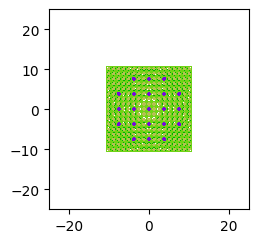

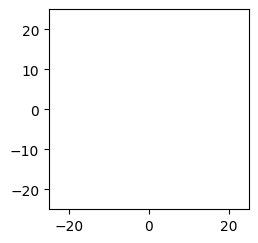

In [120]:
#
# fuel assembly (fa)
#
lat1 = openmc.RectLattice()
lat1.lower_left = -10.7100,-10.7100
lat1.pitch = (1.26,1.26)
# lat1.universes = np.tile(u99,(17, 17))
lat1.universes= [[f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, r, f, f, r, f, f, r, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, r, f, f, r, f, f, r, f, f, r, f, f, r, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, r, f, f, r, f, f, r, f, f, r, f, f, r, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, r, f, f, r, f, f, r, f, f, r, f, f, r, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, r, f, f, r, f, f, r, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f],
                [f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f, f]]
outer = openmc.Cell(fill=h2o) # water
lat1.outer = openmc.Universe(cells=[outer])
# print(fa)

s11=openmc.model.rectangular_prism(21.4173,21.4173)
r11= s11
c11=openmc.Cell(fill=lat1,region=r11)
fa=openmc.Universe(cells=[c11]) 
fa.plot(width=(50.0, 50.0), basis='xy', color_by='material')
# u0.plot(width=(50,50), basis='yz', color_by='material')

#
# dummy assembly (da)
#
s12=openmc.model.rectangular_prism(21.4173,21.4173)
r12= s12
c12=openmc.Cell(fill=None,region=r12)
da=openmc.Universe(cells=[c12]) 
da.plot(width=(50.0, 50.0), basis='xy', color_by='material')

<p>The core consits of 57 assemblies in a 9×9 grid.</p>

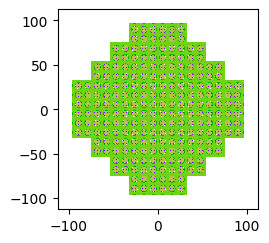

In [119]:
#
# core 
#
lat0 = openmc.RectLattice()
lat0.lower_left = -96.3779,-96.3779
lat0.pitch = (21.4173,21.4173)
lat0.universes= [[da, da, da, fa, fa, fa, da, da, da],
                 [da, da, fa, fa, fa, fa, fa, da, da],
                 [da, fa, fa, fa, fa, fa, fa, fa, da],
                 [fa, fa, fa, fa, fa, fa, fa, fa, fa],
                 [fa, fa, fa, fa, fa, fa, fa, fa, fa],
                 [fa, fa, fa, fa, fa, fa, fa, fa, fa],
                 [da, fa, fa, fa, fa, fa, fa, fa, da],
                 [da, da, fa, fa, fa, fa, fa, da, da],
                 [da, da, da, fa, fa, fa, da, da, da]]
outer = openmc.Cell(fill=h2o) # water
lat0.outer = openmc.Universe(cells=[outer])
s22=openmc.model.rectangular_prism(9*21.4173,9*21.4173,boundary_type='vacuum')
r22= s22
c22=openmc.Cell(fill=lat0,region=r22)
core=openmc.Universe(cells=[c22]) # root universe
core.plot(width=(225, 225), basis='xy', color_by='material')

geomtery = openmc.Geometry(root=core) 
geomtery.export_to_xml()
# !cat geometry.xml